In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data_wav_energy = pd.read_csv("data_feature_wav_energy8_48k_2048_load_1.csv")

In [48]:
data_wav_energy['fault'] = pd.Categorical(data_wav_energy['fault'])

In [49]:
train_wav_energy, test_wav_energy = train_test_split(data_wav_energy, test_size = 700, stratify = data_wav_energy['fault'],
                                                    random_state = 324)

In [50]:
scaler = StandardScaler()
train_wav_energy_scaled = scaler.fit_transform(train_wav_energy.iloc[:,:-1])
test_wav_energy_scaled = (test_wav_energy.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

In [51]:
logistic_clf = LogisticRegression(C = 10, max_iter = 200, n_jobs = -1, random_state=0)

In [52]:
logistic_clf.fit(train_wav_energy_scaled, train_wav_energy['fault'])

LogisticRegression(C=10, max_iter=200, n_jobs=-1, random_state=0)

In [53]:
train_predictions = logistic_clf.predict(train_wav_energy_scaled)
test_predictions = logistic_clf.predict(test_wav_energy_scaled)


In [54]:
train_confu_matrix = confusion_matrix(train_wav_energy['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_wav_energy['fault'], test_predictions)


In [55]:
train_accuracy = accuracy_score(train_wav_energy['fault'], train_predictions)
print("Ovearll training accuracy: ", train_accuracy)

Ovearll training accuracy:  0.919375


In [56]:
test_accuracy = accuracy_score(test_wav_energy['fault'], test_predictions)
print("Ovearll test accuracy: ", test_accuracy)

Ovearll test accuracy:  0.9228571428571428


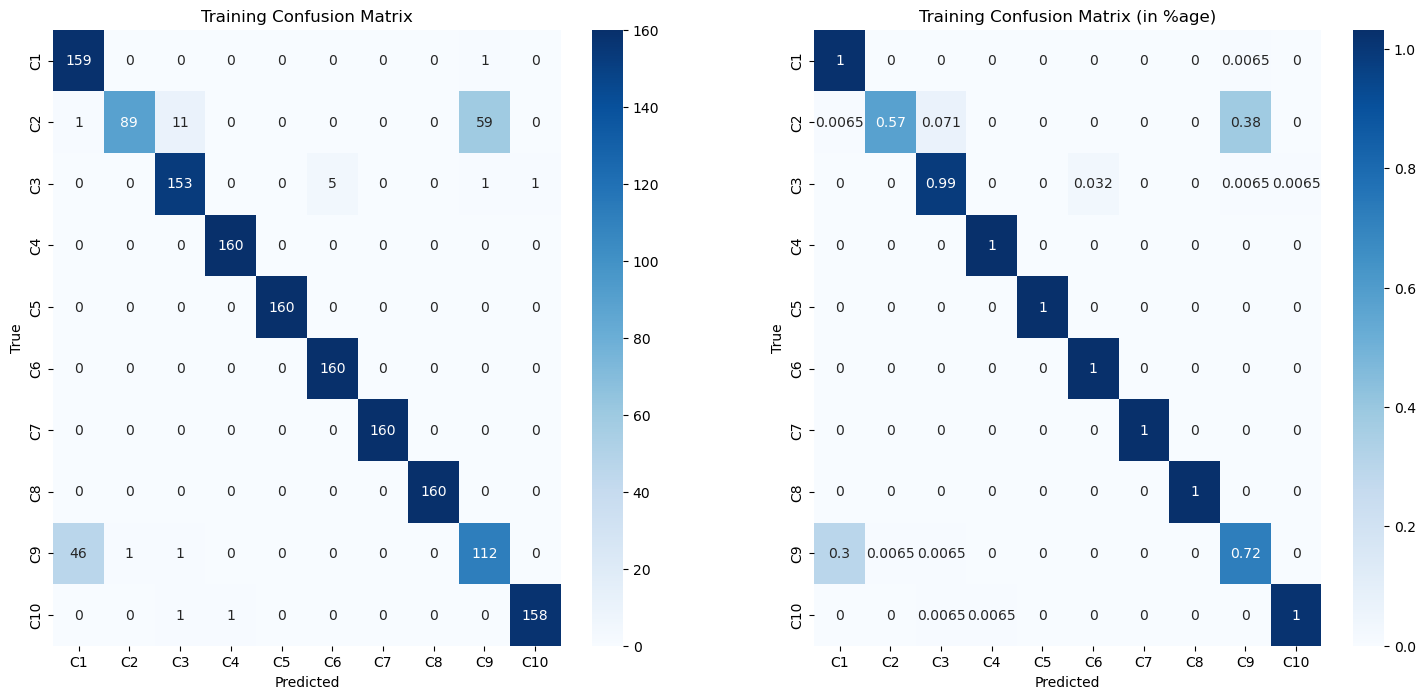

In [57]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

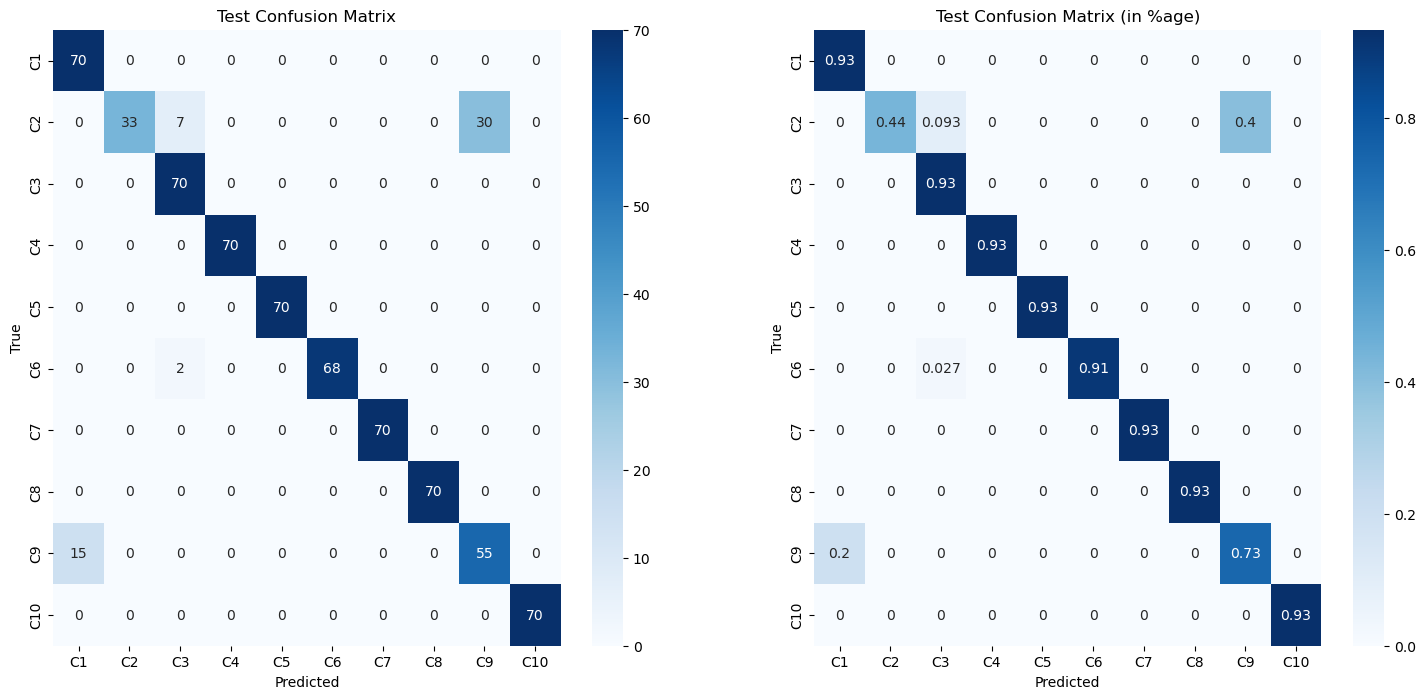

In [58]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
train_precision = precision_score(train_wav_energy['fault'], train_predictions, average='macro')
train_recall = recall_score(train_wav_energy['fault'], train_predictions, average='macro')
train_specificity = np.mean(train_confu_matrix.diagonal() / train_confu_matrix.sum(axis=1))
train_f1_score = f1_score(train_wav_energy['fault'], train_predictions, average='macro')
train_log_loss = log_loss(train_wav_energy['fault'], logistic_clf.predict_proba(train_wav_energy_scaled))

test_precision = precision_score(test_wav_energy['fault'], test_predictions, average='macro')
test_recall = recall_score(test_wav_energy['fault'], test_predictions, average='macro')
test_specificity = np.mean(test_confu_matrix.diagonal() / test_confu_matrix.sum(axis=1))
test_f1_score = f1_score(test_wav_energy['fault'], test_predictions, average='macro')
test_log_loss = log_loss(test_wav_energy['fault'], logistic_clf.predict_proba(test_wav_energy_scaled))



In [60]:
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training Specificity:", train_specificity)
print("Training F1 Score:", train_f1_score)
print("Training Log Loss:", train_log_loss)

Training Precision: 0.9287015621398297
Training Recall: 0.9193749999999999
Training Specificity: 0.9193749999999999
Training F1 Score: 0.9164271169540676
Training Log Loss: 0.404510862898422


In [61]:
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test Specificity:", test_specificity)
print("Test F1 Score:", test_f1_score)
print("Test Log Loss:", test_log_loss)

Test Precision: 0.9356664184661205
Test Recall: 0.9228571428571429
Test Specificity: 0.9228571428571429
Test F1 Score: 0.9178784486648631
Test Log Loss: 0.39194634547924484
